### Recognition of Autism Spectrum Disorder based on AQ-10 Test Results

The AQ-10 (Autism Spectrum Quotient-10) test is a tool designed for the preliminary assessment of the possibility of Autism Spectrum Disorder (ASD) in adults who do not have moderate or severe learning disabilities. It consists of 10 questions and provides a brief assessment of the likelihood of autism features.

It is important to note that AQ-10 is not a conclusive diagnostic procedure, but its results can serve as a basis for determining whether a more detailed and comprehensive examination for ASD is warranted. AQ-10 serves only as an instrument for initial assessment and does not provide definitive certainty in the diagnosis.

#### Type of Task:
Binary Classification

#### Target Label Class Values::
* Predict the confirmation of ASD in patients after taking the AQ-10 test.

* Target class label values:
    
    Class/ASD = 1 , ASD diagnosed
    
    Class/ASD = 0 , ASD not diagnosed

Import of necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

Loading the Dataset

In [2]:
df = pd.read_csv("autism-prediction/Autism-prediction/ASD.csv", sep=';')

In [3]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


* ID - ID of the patient

* A1_Score - A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

* age - Age of the patient in years

* gender - Gender of the patient

* ethnicity - Ethnicity of the patient

* jaundice - Whether the patient had jaundice at the time of birth

* autism - Whether an immediate family member has been diagnosed with autism 

* country_of_res - Country of residence of the patient

* used_app_before - Whether the patient has undergone a screening test before

* result - Score for AQ1-10 screening test

* age_desc - Age of the patient

* relation - Relation of patient who completed the test

* Class/ASD - Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

Let's look at general information about our dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1000 non-null   int64  
 1   A1_Score         1000 non-null   int64  
 2   A2_Score         1000 non-null   int64  
 3   A3_Score         1000 non-null   int64  
 4   A4_Score         1000 non-null   int64  
 5   A5_Score         1000 non-null   int64  
 6   A6_Score         1000 non-null   int64  
 7   A7_Score         1000 non-null   int64  
 8   A8_Score         1000 non-null   int64  
 9   A9_Score         1000 non-null   int64  
 10  A10_Score        1000 non-null   int64  
 11  age              1000 non-null   float64
 12  gender           1000 non-null   object 
 13  ethnicity        1000 non-null   object 
 14  jaundice         1000 non-null   object 
 15  austim           1000 non-null   object 
 16  contry_of_res    1000 non-null   object 
 17  used_app_before

Remove the 'ID' column as we won't need the patient IDs.

In [5]:
df = df.drop('ID', axis=1)

Examine the unique values contained in each of the columns.

In [6]:
for column in df.columns:
    if column not in ['age', 'result']:
        unique_values = df[column].unique()
        print(f"Unique values in the column '{column}': {unique_values}")

Unique values in the column 'A1_Score': [1 0]
Unique values in the column 'A2_Score': [0 1]
Unique values in the column 'A3_Score': [1 0]
Unique values in the column 'A4_Score': [1 0]
Unique values in the column 'A5_Score': [1 0]
Unique values in the column 'A6_Score': [1 0]
Unique values in the column 'A7_Score': [0 1]
Unique values in the column 'A8_Score': [1 0]
Unique values in the column 'A9_Score': [1 0]
Unique values in the column 'A10_Score': [1 0]
Unique values in the column 'gender': ['f' 'm']
Unique values in the column 'ethnicity': ['White-European' 'South Asian' 'Black' 'Asian' 'Middle Eastern ' '?'
 'others' 'Latino' 'Turkish' 'Others' 'Hispanic' 'Pasifika']
Unique values in the column 'jaundice': ['no' 'yes']
Unique values in the column 'austim': ['no' 'yes']
Unique values in the column 'contry_of_res': ['United States' 'Australia' 'United Kingdom' 'New Zealand' 'Italy'
 'Nicaragua' 'Canada' 'United Arab Emirates' 'Netherlands' 'Sri Lanka'
 'India' 'Armenia' 'Sierra Leon

Let's replace incorrect column names in our dataset.

In [7]:
df = df.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")

In the 'ethnicity' field, replace '?' values with 'Unknown' and 'others' with 'Others.'

For the 'relation' field, replace '?' values with 'Unknown.'

In [8]:
df.loc[df['ethnicity'] == '?', 'ethnicity'] = 'Unknown'
df.loc[df['ethnicity'] == 'others', 'ethnicity'] = 'Others'

df.loc[df['relation'] == '?', 'relation'] = 'Unknown'

Upon reviewing our dataset, we observe that the 'age_desc' column is not significant as it contains identical values throughout the dataset. Therefore, we will remove it.

In [9]:
df = df.drop(['age_desc'], axis=1)

In our dataset, there is a field 'age' representing the patients' age in floating-point numbers. For ease of analysis and in accordance with the tradition of measuring age in integer numbers, we will transform this field by replacing fractional values with integer data reflecting the patients' ages.

In [10]:
df['age'] = df['age'].astype(int)

In [11]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,no,no,United States,no,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,no,no,Australia,no,10.544296,Unknown,0
2,1,1,1,1,1,1,0,0,1,1,14,f,White-European,no,no,United Kingdom,no,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,no,no,New Zealand,no,1.530098,Unknown,0
4,0,0,0,0,1,0,0,0,1,1,14,m,Black,no,yes,Italy,no,7.949723,Self,0


Let's count the number of positive and negative ASD diagnostic results and compare them.

In [12]:
ASD_pos = (df['Class/ASD'] == 1).sum()
ASD_neg = (df['Class/ASD'] == 0).sum()

In [13]:
print('Number of patients with a positive test result:', ASD_pos)
print('Number of patients with a negative test result:', ASD_neg)

Number of patients with a positive test result: 275
Number of patients with a negative test result: 725


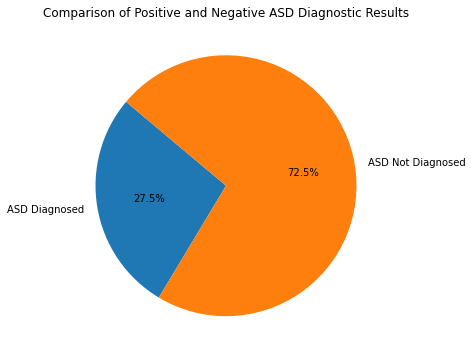

In [14]:
plt.figure(figsize=(10, 6))
values = [ASD_pos, ASD_neg]
plt.pie(values, labels=['ASD Diagnosed', 'ASD Not Diagnosed'], autopct='%1.1f%%', startangle=140)
plt.title('Comparison of Positive and Negative ASD Diagnostic Results')
plt.show()

275 individuals (27.5%) in our dataset have a positive ASD diagnosis, while 725 individuals (72.5%) have a negative ASD diagnosis.

Let's analyze the ASD diagnostic results based on other characteristics.

##### Patient's Age

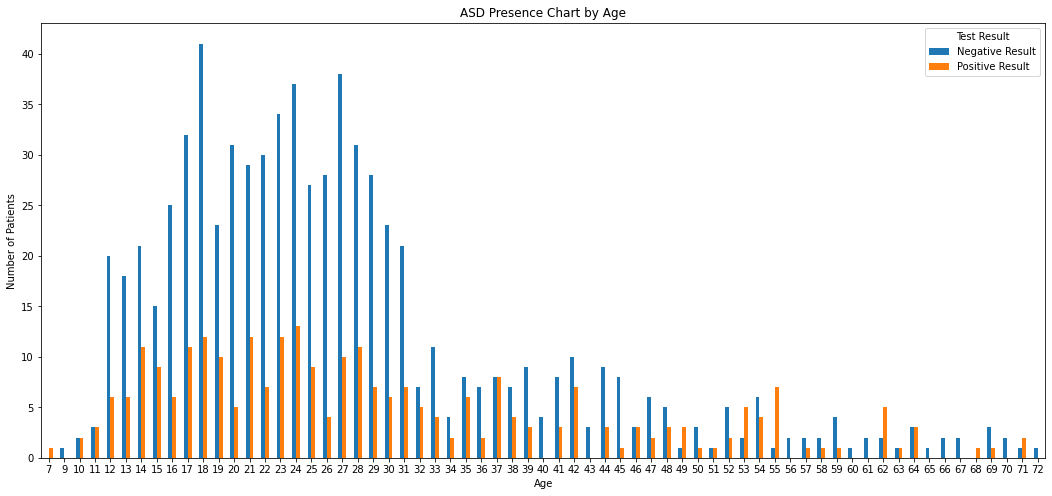

In [15]:
age_counts = df.groupby(['age', 'Class/ASD']).size().unstack(fill_value=0)

age_counts.plot(kind='bar', figsize=(18, 8))
plt.title('ASD Presence Chart by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

Let's take a closer look at the distribution of positive and negative test results for each age group.

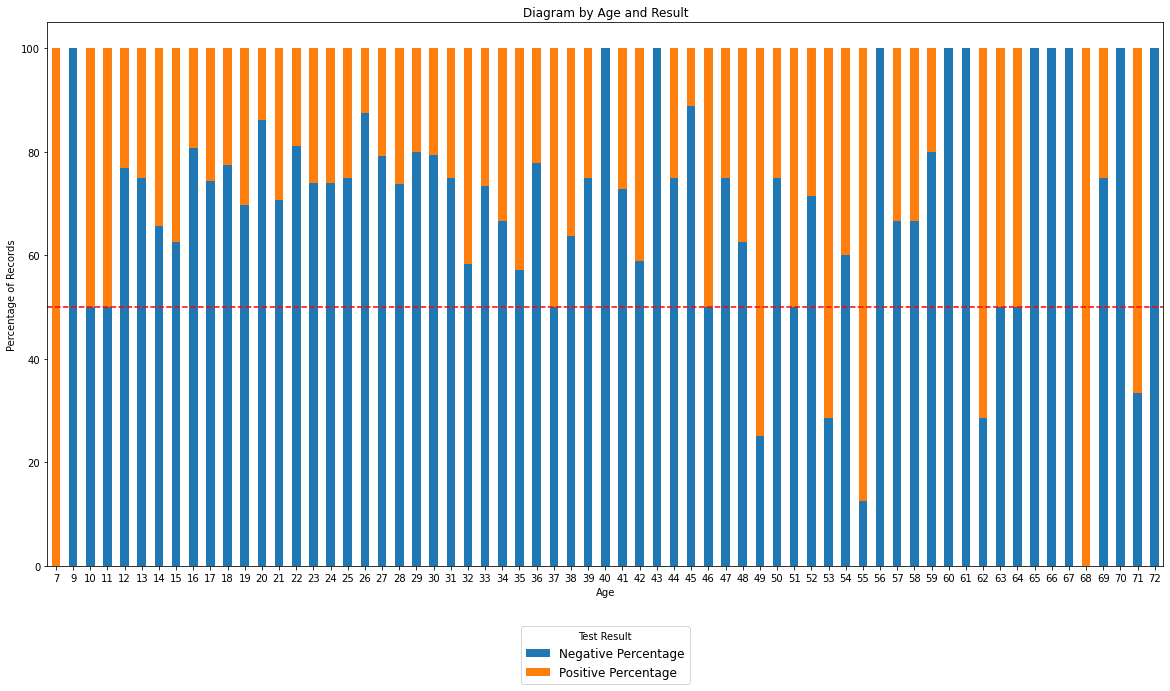

In [16]:
grouped_data = df.groupby(['age', 'Class/ASD']).size().unstack(fill_value=0)

total_counts = grouped_data.sum(axis=1)

grouped_data['Negative Percentage'] = (grouped_data[0] / total_counts * 100).round(2)
grouped_data['Positive Percentage'] = (grouped_data[1] / total_counts * 100).round(2)

grouped_data[['Negative Percentage', 'Positive Percentage']].plot(kind='bar', stacked=True, figsize=(20, 10))

plt.legend(['Negative Percentage', 'Positive Percentage'], title='Test Result', bbox_to_anchor=(0.5, -0.10), loc='upper center', fontsize='large')
plt.axhline(y=50, color='r', linestyle='--') # line indicating 50%
plt.title('Diagram by Age and Result')
plt.xlabel('Age')
plt.ylabel('Percentage of Records')
plt.xticks(rotation=0)

plt.show()

In [17]:
grouped_data['Count of patients'] = grouped_data[0] + grouped_data[1]

In [18]:
grouped_data.head()

Class/ASD,0,1,Negative Percentage,Positive Percentage,Count of patients
age,,,,,
7,0,1,0.00,100.00,1
9,1,0,100.00,0.00,1
10,2,2,50.00,50.00,4
11,3,3,50.00,50.00,6
12,20,6,76.92,23.08,26


In [19]:
print('Average number of patients aged 12 to 31 who underwent testing: ' + str(grouped_data['Count of patients'][3:26].mean()))

Average number of patients aged 12 to 31 who underwent testing: 33.0


In [20]:
print('Average number of patients older than 31 who underwent testing: ' + str(grouped_data['Count of patients'][26:66].mean()))

Average number of patients older than 31 who underwent testing: 6.0256410256410255


Let's calculate the average percentage of patients with negative and positive test results:

In [21]:
print('Average percentage of negative test results: ' + str(grouped_data['Negative Percentage'].mean()))
print('Average percentage of positive test results: ' + str(grouped_data['Positive Percentage'].mean()))

Average percentage of negative test results: 69.15938461538462
Average percentage of positive test results: 30.840615384615386


In [22]:
print('Average percentage of positive test results for patients aged 12 to 31: ' + str(grouped_data['Positive Percentage'][3:26].mean()))

Average percentage of positive test results for patients aged 12 to 31: 26.110869565217385


In [23]:
print('Average percentage of positive test results for patients older than 31: ' + str(grouped_data['Positive Percentage'][26:66].mean()))

Average percentage of positive test results for patients older than 31: 32.15615384615385


The main group of tested patients falls within the age range of 12 to 31 years, with an average count of 33 individuals. Meanwhile, for patients older than 31 years, this average count decreases to 6 individuals. This indicates a more active participation in testing among the younger age group.

Analyzing the test results, we observe that the average percentage of patients with a positive ASD diagnosis is 30.84%, while 69.16% have a negative diagnosis.

When examining these results by age groups, we notice that in the age range of 12 to 31 years, the average percentage of positively diagnosed ASD slightly decreases to 26.11%. Meanwhile, for patients older than 31 years, the average percentage of positive diagnoses increases to 32.16%.

##### Gender

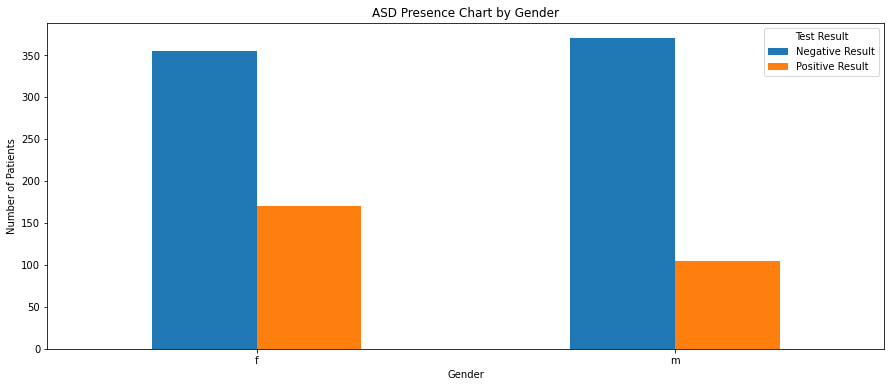

In [24]:
gender_counts = df.groupby(['gender', 'Class/ASD']).size().unstack(fill_value=0)

gender_counts.plot(kind='bar', figsize=(15, 6))
plt.title('ASD Presence Chart by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

Calculate the total number of patients by gender

In [25]:
gender_counts['Patients'] = gender_counts[0] + gender_counts[1]

Calculate the percentage of positive and negative ASD diagnoses for each gender

In [26]:
gender_counts['Percentage Negative'] = (gender_counts[0] / gender_counts['Patients'] * 100).round(2)
gender_counts['Percentage Positive'] = (gender_counts[1] / gender_counts['Patients'] * 100).round(2)

In [27]:
gender_counts

Class/ASD,0,1,Patients,Percentage Negative,Percentage Positive
gender,,,,,
f,355,170,525,67.62,32.38
m,370,105,475,77.89,22.11


In [28]:
print('Percentage of female patients among all patients: ' + str(gender_counts['Patients'][0] / (gender_counts['Patients'][0] + gender_counts['Patients'][1]) * 100))

Percentage of female patients among all patients: 52.5


In [29]:
print('Percentage of positive ASD diagnoses among the total number of females: ' + str(gender_counts['Percentage Positive'][0]))

Percentage of positive ASD diagnoses among the total number of females: 32.38


In [30]:
print('Percentage of positive ASD diagnoses among the total number of males: ' + str(gender_counts['Percentage Positive'][1]))

Percentage of positive ASD diagnoses among the total number of males: 22.11


In our dataset, there are more females than males. Females constitute 52.5% of the total number of patients, while males constitute 47.5%. This may be associated with higher sensitivity in females to early symptoms or more frequent medical consultations.

Analyzing the results of autism spectrum disorder (ASD) diagnosis, it is evident that the percentage of positive diagnoses among females is 32.38%, while among males, this percentage is lower at 22.11%. Thus, more females are diagnosed with ASD compared to males, despite the gender distribution being approximately equal.

##### Ethnicity

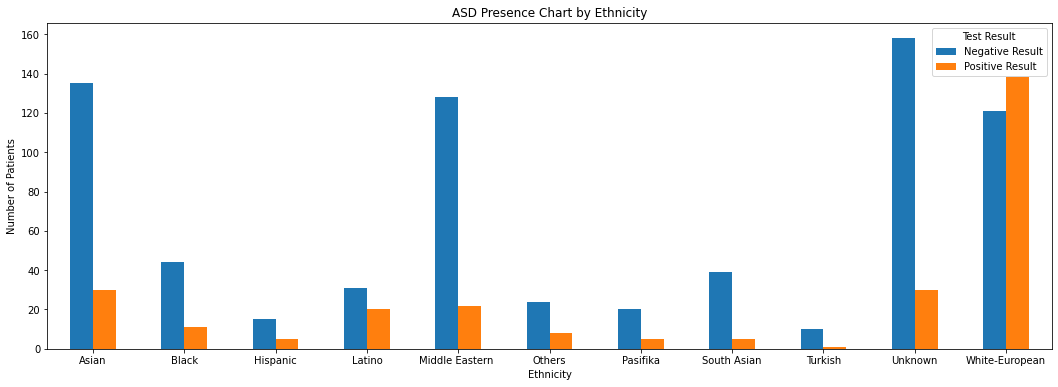

In [31]:
ethnicity_counts = df.groupby(['ethnicity', 'Class/ASD']).size().unstack(fill_value=0)

ethnicity_counts.plot(kind='bar', figsize=(18, 6))
plt.title('ASD Presence Chart by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

Calculate the number of patients for each ethnic group

In [32]:
ethnicity_counts['Total Patients'] = ethnicity_counts[0] + ethnicity_counts[1]

Calculate the percentage of positively diagnosed patients for each ethnic group

In [33]:
ethnicity_counts['% Positive'] = (ethnicity_counts[1] / ethnicity_counts['Total Patients'] * 100).round(2)

Calculate the percentage of patients for each ethnic group relative to all patients

In [34]:
ethnicity_counts['% of Total Patients'] = (ethnicity_counts['Total Patients'] / 1000 * 100).round(2)

Let's examine the positively diagnosed patients in each ethnic group relative to all patients.

We will calculate the percentage of positive patients in this ethnic group relative to all ethnic groups.

In [35]:
ethnicity_counts['% Positive Patients in Ethnic Group'] = (ethnicity_counts[1] / 1000 * 100).round(2)

Calculate the percentage of positively diagnosed patients in each ethnic group relative to all positively diagnosed patients

In [36]:
ethnicity_counts['% Positive Patients in Ethnic Group Relative to All Positive'] = (ethnicity_counts[1] / ASD_pos * 100).round(2)

In [37]:
ethnicity_counts

Class/ASD,0,1,Total Patients,% Positive,% of Total Patients,% Positive Patients in Ethnic Group,% Positive Patients in Ethnic Group Relative to All Positive
ethnicity,,,,,,,
Asian,135,30,165,18.18,16.5,3.0,10.91
Black,44,11,55,20.00,5.5,1.1,4.00
Hispanic,15,5,20,25.00,2.0,0.5,1.82
Latino,31,20,51,39.22,5.1,2.0,7.27
Middle Eastern,128,22,150,14.67,15.0,2.2,8.00
Others,24,8,32,25.00,3.2,0.8,2.91
Pasifika,20,5,25,20.00,2.5,0.5,1.82
South Asian,39,5,44,11.36,4.4,0.5,1.82
Turkish,10,1,11,9.09,1.1,0.1,0.36


The ethnic group "White-European" has the highest percentage of positive results (13.8%) in the overall dataset and also the highest among all positively diagnosed patients (50.18%), while the ethnic groups "Pasifika" (0.5%) and "Turkish" (0.1%) have much lower percentages in the overall dataset.

There is also a significant percentage of cases with unknown ethnicity. Noticeably, the percentage of positive patients in the "Unknown" ethnic group is 10.91% relative to all positively diagnosed patients, which is the second-highest value (sharing this second place with the "Asian" ethnic group, which also has 10.91%). Further research is needed to understand the reasons behind such values and to clarify information about ethnicity.

When considering each ethnic group separately, the highest percentage of positively diagnosed patients is observed in White-European with 53.28%, followed by Latino with 39.22%.

##### Jaundice

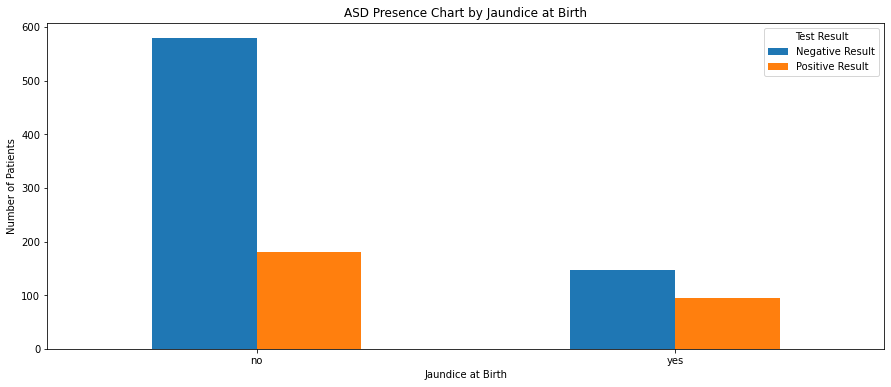

In [38]:
jaundice_counts = df.groupby(['jaundice', 'Class/ASD']).size().unstack(fill_value=0)

jaundice_counts.plot(kind='bar', figsize=(15, 6))
plt.title('ASD Presence Chart by Jaundice at Birth')
plt.xlabel('Jaundice at Birth')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

Calculate the total number of patients for those who had jaundice at birth and those who did not

In [39]:
jaundice_counts['Total Patients'] = jaundice_counts[0] + jaundice_counts[1]

Calculate the percentage of positive diagnoses for each group

In [40]:
jaundice_counts['% Positive Diagnoses'] = (jaundice_counts[1] / jaundice_counts['Total Patients'] * 100).round(2)

Calculate the percentage of positively diagnosed patients for each group relative to all patients

In [41]:
jaundice_counts['% Positive Patients Relative to All'] = (jaundice_counts[1] / 1000 * 100).round(2)

Calculate the percentage of positively diagnosed patients for each group relative to all positive patients

In [42]:
jaundice_counts['% Positive Patients Relative to Positive'] = (jaundice_counts[1] / ASD_pos * 100).round(2)

In [43]:
jaundice_counts

Class/ASD,0,1,Total Patients,% Positive Diagnoses,% Positive Patients Relative to All,% Positive Patients Relative to Positive
jaundice,,,,,,
no,579,181,760,23.82,18.1,65.82
yes,146,94,240,39.17,9.4,34.18


The percentage of positive diagnoses among patients who had jaundice at birth is 39.17%, significantly higher than among patients without jaundice at birth, where this percentage is 23.82%. This may indicate a connection between the presence of jaundice and the likelihood of a positive ASD diagnosis.

Patients who had jaundice at birth and were diagnosed with ASD constitute 34.18% of the total net positive diagnosed patients.

##### Whether an immediate family member has been diagnosed with autism

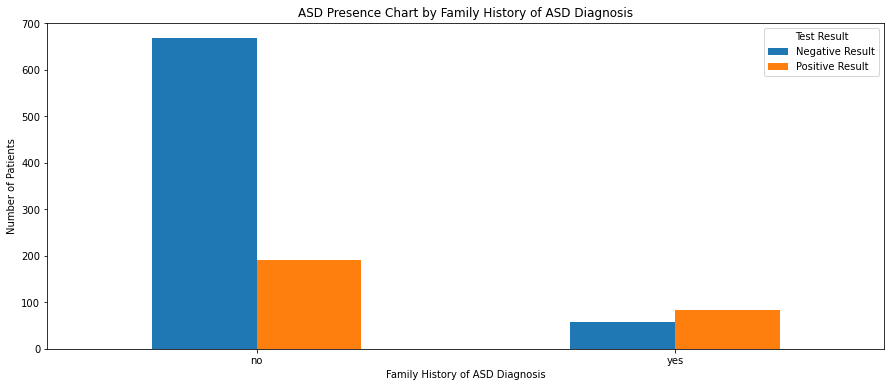

In [44]:
autism_counts = df.groupby(['autism', 'Class/ASD']).size().unstack(fill_value=0)

autism_counts.plot(kind='bar', figsize=(15, 6))
plt.title('ASD Presence Chart by Family History of ASD Diagnosis')
plt.xlabel('Family History of ASD Diagnosis')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

Calculate the total number of patients in the groups

In [45]:
autism_counts['Total Patients in Groups'] = autism_counts[0] + autism_counts[1]

Calculate the percentage of patients in the groups relative to all patients

In [46]:
autism_counts['% Patients in Groups'] = autism_counts['Total Patients in Groups'] / 1000 * 100

Calculate the percentage of positive diagnoses in the groups

In [47]:
autism_counts['% Positive Diagnoses in Groups'] = (autism_counts[1] / autism_counts['Total Patients in Groups'] * 100).round(2)

Calculate the percentage of positive patients in each group relative to all patients

In [48]:
autism_counts['% Positive Patients in Group Relative to Total'] = (autism_counts[1] / 1000 * 100).round(2)

Calculate the percentage of positive patients in each group relative to all positive patients

In [49]:
autism_counts['% Positive Patients in Group Relative to Positive'] = (autism_counts[1] / ASD_pos * 100).round(2)

In [50]:
autism_counts

Class/ASD,0,1,Total Patients in Groups,% Patients in Groups,% Positive Diagnoses in Groups,% Positive Patients in Group Relative to Total,% Positive Patients in Group Relative to Positive
autism,,,,,,,
no,668,191,859,85.9,22.24,19.1,69.45
yes,57,84,141,14.1,59.57,8.4,30.55


The group of patients with no family history of ASD diagnosis constitutes a significant majority - 85.9%. In this group, the percentage of positive diagnoses is 22.24%, and in the context of all positively diagnosed patients, it is 69.45%.

The group of patients with a family history of ASD diagnosis is relatively small - 14.1%. However, in this group, there is a high percentage of positive diagnoses - 55.57%, but in the context of all positively diagnosed patients, it is 30.55%.

##### Country of residence

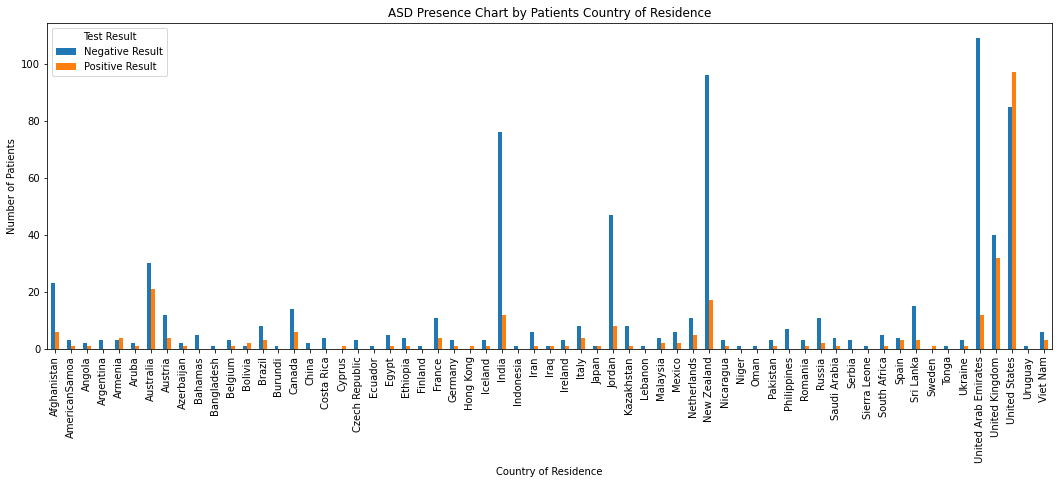

In [51]:
country_of_res_counts = df.groupby(['country_of_res', 'Class/ASD']).size().unstack(fill_value=0)

country_of_res_counts.plot(kind='bar', figsize=(18, 6))
plt.title('ASD Presence Chart by Patients Country of Residence')
plt.xlabel('Country of Residence')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.show()

Calculate the total number of patients in groups by country of residence

In [52]:
country_of_res_counts['Total Patients in Groups'] = country_of_res_counts[0] + country_of_res_counts[1]

Calculate the percentage of patients in groups relative to the total number of patients

In [53]:
country_of_res_counts['% Patients in Groups'] = country_of_res_counts['Total Patients in Groups'] / 1000 * 100

Calculate the percentage of positive diagnoses in groups

In [54]:
country_of_res_counts['% Positive Diagnoses in Groups'] = (country_of_res_counts[1] / country_of_res_counts['Total Patients in Groups'] * 100).round(2)

Calculate the percentage of positive patients in each group relative to the total number of patients

In [55]:
country_of_res_counts['% Positive Patients in Group Relative to Total'] = (country_of_res_counts[1] / 1000 * 100).round(2)

Calculate the percentage of positive patients in each group relative to all positive patients

In [56]:
country_of_res_counts['% Positive Patients in Group Relative to Positive'] = (country_of_res_counts[1] / ASD_pos * 100).round(2)

In [57]:
country_of_res_counts.head(60)

Class/ASD,0,1,Total Patients in Groups,% Patients in Groups,% Positive Diagnoses in Groups,% Positive Patients in Group Relative to Total,% Positive Patients in Group Relative to Positive
country_of_res,,,,,,,
Afghanistan,23,6,29,2.9,20.69,0.6,2.18
AmericanSamoa,3,1,4,0.4,25.00,0.1,0.36
Angola,2,1,3,0.3,33.33,0.1,0.36
Argentina,3,0,3,0.3,0.00,0.0,0.00
Armenia,3,4,7,0.7,57.14,0.4,1.45
Aruba,2,1,3,0.3,33.33,0.1,0.36
Australia,30,21,51,5.1,41.18,2.1,7.64
Austria,12,4,16,1.6,25.00,0.4,1.45
Azerbaijan,2,1,3,0.3,33.33,0.1,0.36


In [58]:
country_of_res_counts.tail(3)

Class/ASD,0,1,Total Patients in Groups,% Patients in Groups,% Positive Diagnoses in Groups,% Positive Patients in Group Relative to Total,% Positive Patients in Group Relative to Positive
country_of_res,,,,,,,
United States,85,97,182,18.2,53.30,9.7,35.27
Uruguay,1,0,1,0.1,0.00,0.0,0.00
Viet Nam,6,3,9,0.9,33.33,0.3,1.09


In [59]:
max_value = country_of_res_counts.iloc[:, -1].max()
max_value

35.27

In [60]:
country_with_max_value = country_of_res_counts[country_of_res_counts.iloc[:, -1] == max_value].index[0]

In [61]:
print('Country with the highest percentage of positively diagnosed patients among all positive patients: ' + country_with_max_value + ' with a value of ' + str(max_value))

Country with the highest percentage of positively diagnosed patients among all positive patients: United States with a value of 35.27


##### Whether the patient has undergone a screening test before

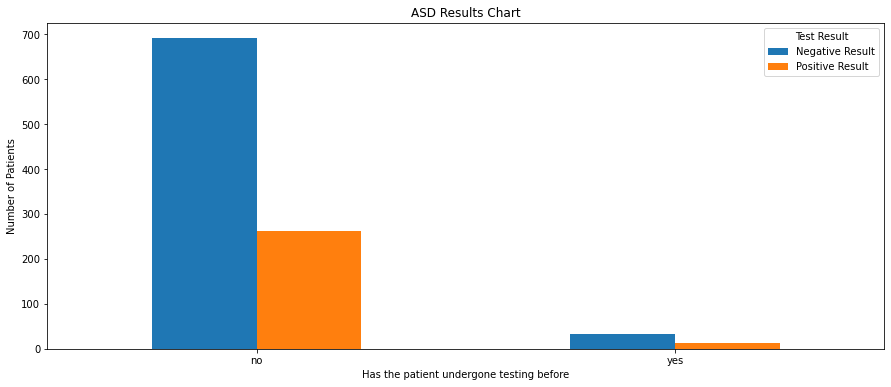

In [62]:
used_app_counts = df.groupby(['used_app_before', 'Class/ASD']).size().unstack(fill_value=0)

used_app_counts.plot(kind='bar', figsize=(15, 6))
plt.title('ASD Results Chart')
plt.xlabel('Has the patient undergone testing before')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

Calculate the total number of patients in groups

In [63]:
used_app_counts['Total Patients in Groups'] = used_app_counts[0] + used_app_counts[1]

Calculate the percentage of positive diagnoses in groups

In [64]:
used_app_counts['% Positive Diagnoses in Groups'] = (used_app_counts[1] / used_app_counts['Total Patients in Groups'] * 100).round(2)

Calculate the percentage of positive patients in each group relative to the total number of patients

In [65]:
used_app_counts['% Positive Patients in Group Relative to Total'] = (used_app_counts[1] / 1000 * 100).round(2)

Calculate the percentage of positive patients in each group relative to all positive patients

In [66]:
used_app_counts['% Positive Patients in Group Relative to Positive'] = (used_app_counts[1] / ASD_pos * 100).round(2)

In [67]:
used_app_counts

Class/ASD,0,1,Total Patients in Groups,% Positive Diagnoses in Groups,% Positive Patients in Group Relative to Total,% Positive Patients in Group Relative to Positive
used_app_before,,,,,,
no,691,262,953,27.49,26.2,95.27
yes,34,13,47,27.66,1.3,4.73


Comparing the total number of patients who have not undergone testing before and those who have, it can be seen that almost all positively diagnosed patients are in the group of those who have not undergone testing, constituting 95.27% of the total number of positive patients.

Among patients who have not undergone testing before, the percentage of positive diagnoses is 27.49%. For those who have undergone testing before, this percentage is approximately the same and is 27.66%.

The proportion of positively diagnosed patients relative to the total number of patients in each group significantly differs. For patients who underwent testing, this proportion is 1.3%, while for those who did not undergo testing, it is higher at 26.2%.

##### Relation

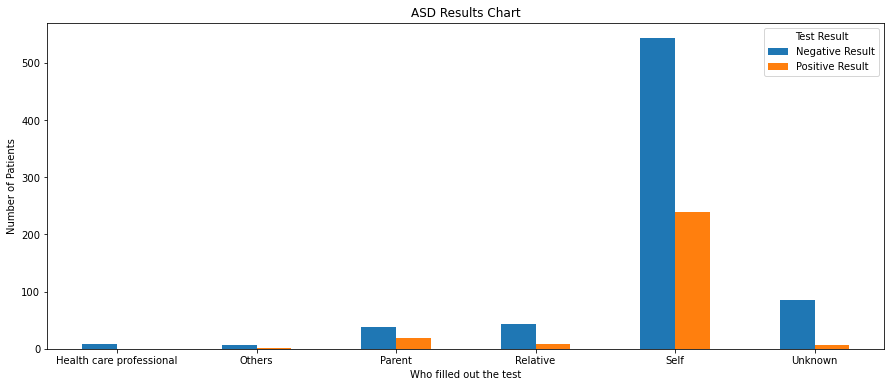

In [68]:
relation_counts = df.groupby(['relation', 'Class/ASD']).size().unstack(fill_value=0)

relation_counts.plot(kind='bar', figsize=(15, 6))
plt.title('ASD Results Chart')
plt.xlabel('Who filled out the test')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

Calculate the total number of patients in groups

In [69]:
relation_counts['Total Patients in Groups'] = relation_counts[0] + relation_counts[1]

Calculate the percentage of patients in groups

In [70]:
relation_counts['% Patients in Groups'] = relation_counts['Total Patients in Groups'] / 1000 * 100

Calculate the percentage of positive diagnoses in groups

In [71]:
relation_counts['% Positive Diagnoses in Groups'] = (relation_counts[1] / relation_counts['Total Patients in Groups'] * 100).round(2)

Calculate the percentage of positive patients in each group relative to the total number of patients

In [72]:
relation_counts['% Positive Patients in Group Relative to Total'] = (relation_counts[1] / 1000 * 100).round(2)

Calculate the percentage of positive patients in each group relative to all positive patients

In [73]:
relation_counts['% Positive Patients in Group Relative to Positive'] = (relation_counts[1] / ASD_pos * 100).round(2)

In [74]:
relation_counts

Class/ASD,0,1,Total Patients in Groups,% Patients in Groups,% Positive Diagnoses in Groups,% Positive Patients in Group Relative to Total,% Positive Patients in Group Relative to Positive
relation,,,,,,,
Health care professional,8,0,8,0.8,0.00,0.0,0.00
Others,7,1,8,0.8,12.50,0.1,0.36
Parent,38,19,57,5.7,33.33,1.9,6.91
Relative,44,9,53,5.3,16.98,0.9,3.27
Self,543,240,783,78.3,30.65,24.0,87.27
Unknown,85,6,91,9.1,6.59,0.6,2.18


The group of patients who filled out the test themselves ("Self") constitutes a significant majority among all relationship groups (78.3% of the total number of patients). This group also has the highest percentage of positive diagnoses among the total number of patients (24.0%) and ranks second in the percentage of positive patients in the group (30.65%).

The "Parent" and "Relative" groups also have a significant number of patients (5.7% and 5.3%, respectively) and a high percentage of positive diagnoses within the group (33.33% and 16.98%, respectively). These groups represent the second and third highest percentage of positive diagnoses relative to positive patients.

The "Health care professional" group has the lowest percentage of positive diagnoses (0%) and the smallest percentage of patients (0.8%). This may be related to healthcare professionals having more experience and knowledge, allowing them to more accurately identify negative ASD diagnoses.

The "Unknown" group includes patients whose relationship to the person filling out the test is unknown. This group has a relatively low percentage of positive diagnoses (6.59% positive results in the group and 2.18% relative to the total number of positive patients), and they constitute 9.1% of the total number of patients.

##### AQ1-10

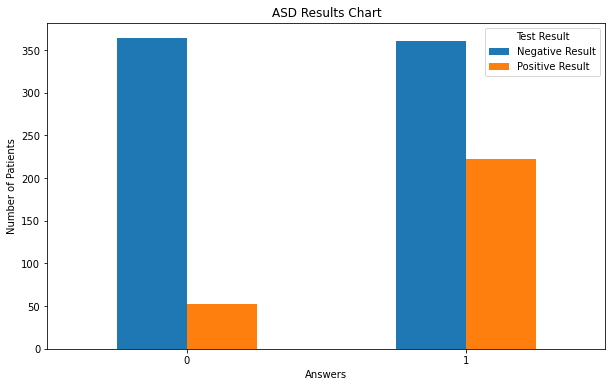

In [75]:
A1_Score_counts = df.groupby(['A1_Score', 'Class/ASD']).size().unstack(fill_value=0)

A1_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('ASD Results Chart')
plt.xlabel('Answers')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

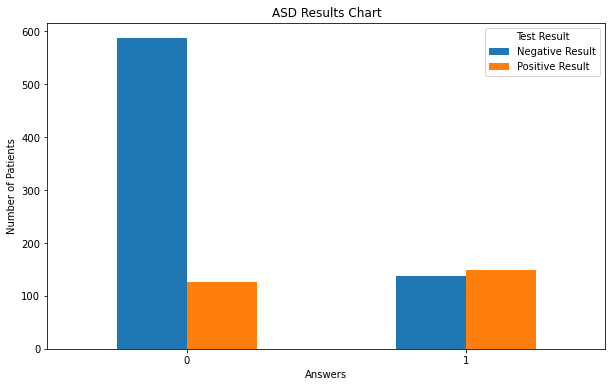

In [76]:
A2_Score_counts = df.groupby(['A2_Score', 'Class/ASD']).size().unstack(fill_value=0)

A2_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('ASD Results Chart')
plt.xlabel('Answers')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

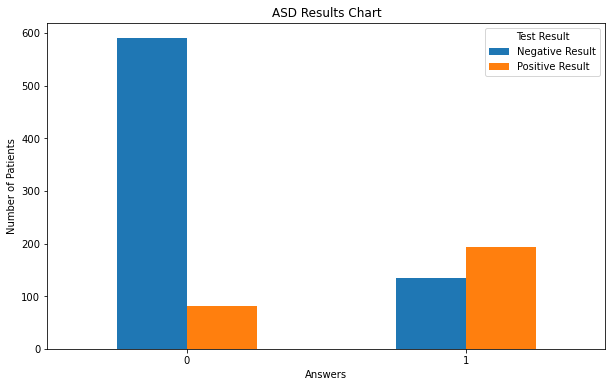

In [77]:
A3_Score_counts = df.groupby(['A3_Score', 'Class/ASD']).size().unstack(fill_value=0)

A3_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('ASD Results Chart')
plt.xlabel('Answers')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

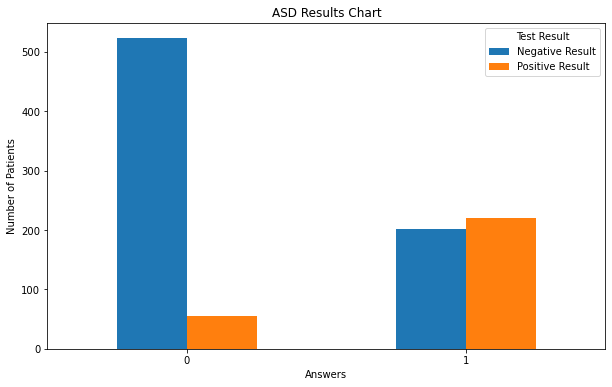

In [78]:
A4_Score_counts = df.groupby(['A4_Score', 'Class/ASD']).size().unstack(fill_value=0)

A4_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('ASD Results Chart')
plt.xlabel('Answers')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

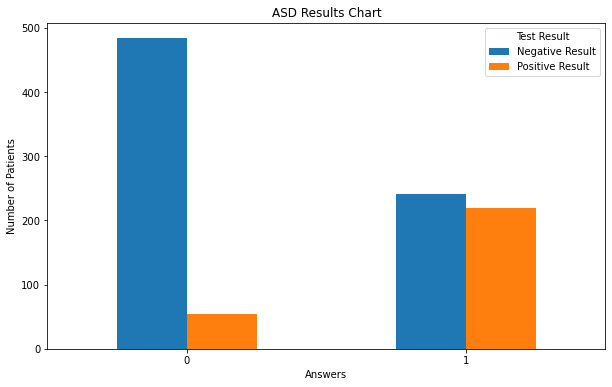

In [79]:
A5_Score_counts = df.groupby(['A5_Score', 'Class/ASD']).size().unstack(fill_value=0)

A5_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('ASD Results Chart')
plt.xlabel('Answers')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

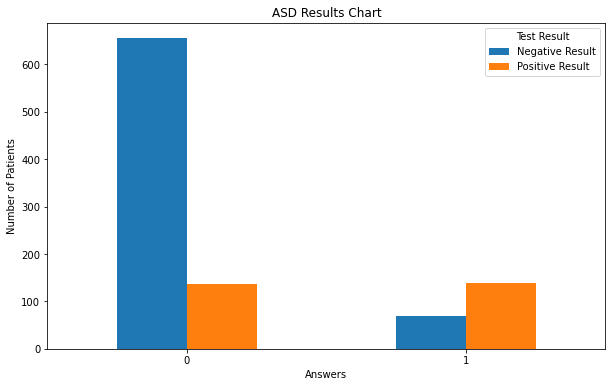

In [80]:
A6_Score_counts = df.groupby(['A6_Score', 'Class/ASD']).size().unstack(fill_value=0)

A6_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('ASD Results Chart')
plt.xlabel('Answers')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

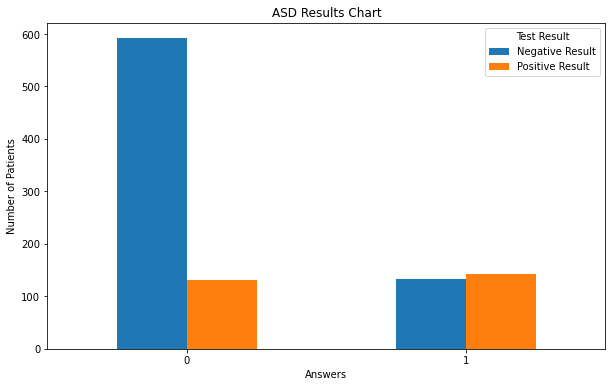

In [81]:
A7_Score_counts = df.groupby(['A7_Score', 'Class/ASD']).size().unstack(fill_value=0)

A7_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('ASD Results Chart')
plt.xlabel('Answers')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

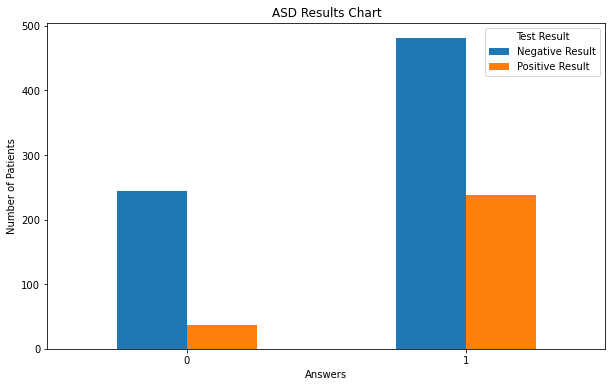

In [82]:
A8_Score_counts = df.groupby(['A8_Score', 'Class/ASD']).size().unstack(fill_value=0)

A8_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('ASD Results Chart')
plt.xlabel('Answers')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

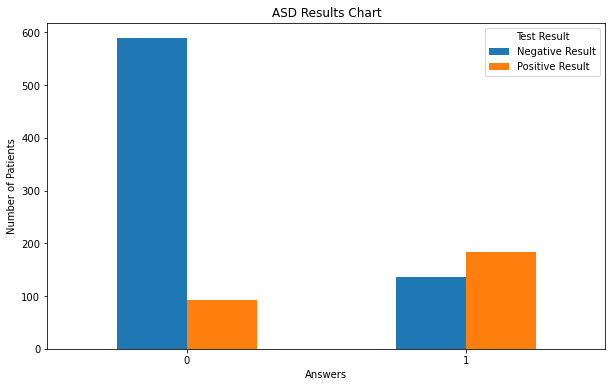

In [83]:
A9_Score_counts = df.groupby(['A9_Score', 'Class/ASD']).size().unstack(fill_value=0)

A9_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('ASD Results Chart')
plt.xlabel('Answers')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

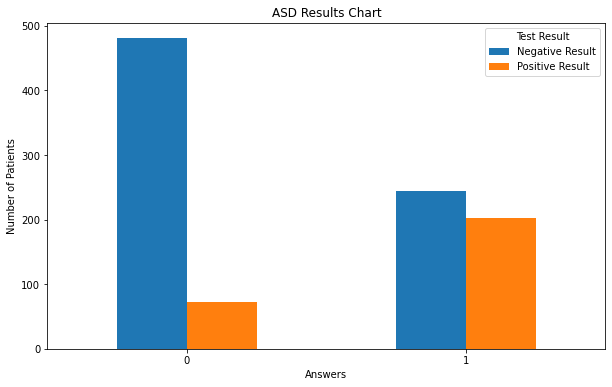

In [84]:
A10_Score_counts = df.groupby(['A10_Score', 'Class/ASD']).size().unstack(fill_value=0)

A10_Score_counts.plot(kind='bar', figsize=(10, 6))
plt.title('ASD Results Chart')
plt.xlabel('Answers')
plt.ylabel('Number of Patients')
plt.legend(['Negative Result', 'Positive Result'], title='Test Result')
plt.xticks(rotation=0)
plt.show()

Replace 'yes' and 'no' values in the 'jaundice', 'autism', and 'used_app_before' fields with '1' and '0', respectively.

In [85]:
df['jaundice'] = df['jaundice'].replace({'yes': 1, 'no': 0})
df['autism'] = df['autism'].replace({'yes': 1, 'no': 0})
df['used_app_before'] = df['used_app_before'].replace({'yes': 1, 'no': 0})

In [86]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,0,0,United States,0,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,0,0,Australia,0,10.544296,Unknown,0
2,1,1,1,1,1,1,0,0,1,1,14,f,White-European,0,0,United Kingdom,0,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,0,0,New Zealand,0,1.530098,Unknown,0
4,0,0,0,0,1,0,0,0,1,1,14,m,Black,0,1,Italy,0,7.949723,Self,0


Build a correlation matrix.

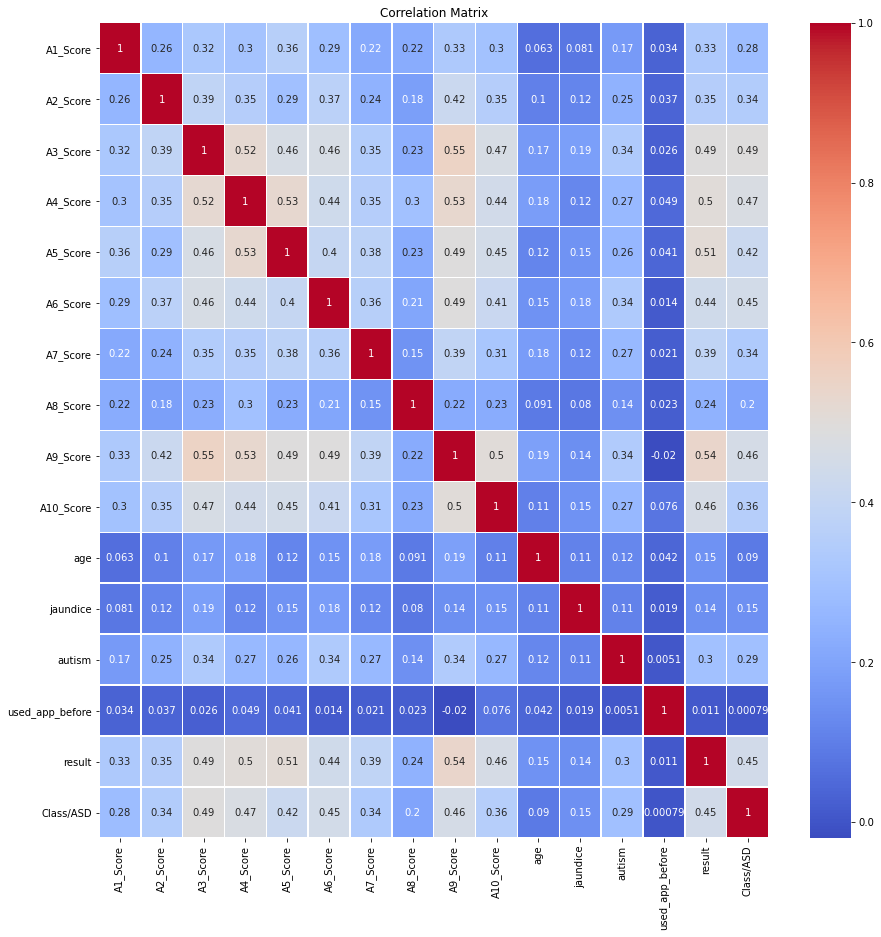

In [87]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Some pairs of variables exhibit high positive correlations. For instance, variables A3_Score and A4_Score have a correlation of 0.524366, indicating that an increase in responses to questions A3 and A4 is associated with higher results. Similarly, variables A3_Score and A9_Score show a high positive correlation (0.554643), suggesting a strong connection between responses to questions A3 and A9.

On the other hand, some variables display high negative correlations. For example, the variable 'autism' has a correlation of -0.108723 with the variable 'jaundice'. This may indicate a negative relationship between certain variables.

It's worth noting that variables related to test responses (A1_Score to A10_Score) have relatively low correlations with age, suggesting that age has a limited impact on patients' responses to test questions.

Regarding the target variable 'Class/ASD,' some variables have some influence on this target variable. For instance, variables A3_Score and A9_Score show relatively high correlations with 'Class/ASD' (0.490384 and 0.471378, respectively), indicating that responses to these questions may be related to the presence of ASD.

#### Data Preparation:

Remove variables that do not significantly contribute to ASD determination (patient's country of residence and whether the patient underwent previous diagnostics).

In [88]:
df = df.drop('country_of_res', axis=1)
df = df.drop('used_app_before', axis=1)

In [89]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18,f,White-European,0,0,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,13,f,South Asian,0,0,10.544296,Unknown,0
2,1,1,1,1,1,1,0,0,1,1,14,f,White-European,0,0,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,61,f,South Asian,0,0,1.530098,Unknown,0
4,0,0,0,0,1,0,0,0,1,1,14,m,Black,0,1,7.949723,Self,0


Encode categorical features using OneHotEncoder.

In [90]:
oh = OneHotEncoder()

In [91]:
h_inter1, h_categories1 = df['gender'].factorize()
h_inter2, h_categories2 = df['ethnicity'].factorize()
h_inter3, h_categories3 = df['relation'].factorize()

In [92]:
h_categories1

Index(['f', 'm'], dtype='object')

In [93]:
h_categories2

Index(['White-European', 'South Asian', 'Black', 'Asian', 'Middle Eastern ',
       'Unknown', 'Others', 'Latino', 'Turkish', 'Hispanic', 'Pasifika'],
      dtype='object')

In [94]:
h_categories3

Index(['Self', 'Unknown', 'Health care professional', 'Parent', 'Relative',
       'Others'],
      dtype='object')

In [95]:
coded1 = oh.fit_transform(h_inter1.reshape(-1,1))
coded2 = oh.fit_transform(h_inter2.reshape(-1,1))
coded3 = oh.fit_transform(h_inter3.reshape(-1,1))

In [96]:
proxy1 = pd.DataFrame(coded1.toarray(), columns = ['female', 'male'])
proxy2 = pd.DataFrame(coded2.toarray(), columns = ['White-European', 'South Asian', 'Black', 'Asian', 'Middle Eastern ',
                                                   'Unknown ethnicity', 'Others', 'Latino', 'Turkish', 'Hispanic', 'Pasifika'])
proxy3 = pd.DataFrame(coded3.toarray(), columns = ['Self', 'Unknown relation', 'Health care professional', 'Parent', 'Relative',
       'Others'])

In [97]:
df = pd.concat([df, proxy1], axis = 1)
df = pd.concat([df, proxy2], axis = 1)
df = pd.concat([df, proxy3], axis = 1)

In [98]:
df = df.drop(['gender'], axis=1)
df = df.drop(['ethnicity'], axis=1)
df = df.drop(['relation'], axis=1)

In [99]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Latino,Turkish,Hispanic,Pasifika,Self,Unknown relation,Health care professional,Parent,Relative,Others
0,1,0,1,1,1,1,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,1,0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Separate the target variable 'Class/ASD.'

In [100]:
X = df.drop(['Class/ASD'], axis=1)
Y = df['Class/ASD']

Split the data into train and test sets.

In [101]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)

Scale the data using StandardScaler.

In [102]:
ss = StandardScaler()

In [103]:
X_train_ss = ss.fit_transform(X_train)

In [104]:
X_test_ss = ss.transform(X_test)

#### Logistic Regression

In [105]:
logreg = LogisticRegression()

In [106]:
logreg.fit(X_train_ss, Y_train)

LogisticRegression()

In [107]:
pred_logreg = logreg.predict(X_test_ss)

In [108]:
binary_pred_logreg = [1 if pred >= 0.5 else 0 for pred in pred_logreg]

In [109]:
confusion_matrix(Y_test, binary_pred_logreg)

array([[133,  14],
       [ 27,  26]], dtype=int64)

In [110]:
accuracy_score(Y_test, binary_pred_logreg)

0.795

#### Decision Tree

In [111]:
tree = DecisionTreeClassifier()

In [112]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [113]:
pred_tree = tree.predict(X_test_ss)

In [114]:
confusion_matrix(Y_test,pred_tree)

array([[108,  39],
       [ 47,   6]], dtype=int64)

In [115]:
accuracy_score(Y_test,pred_tree)

0.57

#### Random Forest

In [116]:
forest_class = RandomForestClassifier()

In [117]:
forest_class.fit(X_train_ss, Y_train)

RandomForestClassifier()

In [118]:
preds_forest_class = forest_class.predict(X_test_ss)

In [119]:
accuracy_score(Y_test, preds_forest_class)

0.815

In [120]:
confusion_matrix(Y_test,preds_forest_class)

array([[134,  13],
       [ 24,  29]], dtype=int64)

Consider Feature Importance

In [121]:
importances = forest_class.feature_importances_

features = X_train.columns
feature_importance = list(zip(features, importances))

feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: result, Importance: 0.1847889188436807
Feature: age, Importance: 0.11312577300965089
Feature: A6_Score, Importance: 0.07880727468885725
Feature: A4_Score, Importance: 0.07446180655401392
Feature: A3_Score, Importance: 0.06139452867522568
Feature: A5_Score, Importance: 0.0557409593195777
Feature: A9_Score, Importance: 0.05240736872922478
Feature: A7_Score, Importance: 0.038239126828583284
Feature: A2_Score, Importance: 0.03324771881937772
Feature: A10_Score, Importance: 0.032011491192347044
Feature: autism, Importance: 0.028392990133651663
Feature: White-European, Importance: 0.026447178890848525
Feature: A1_Score, Importance: 0.023817160217559773
Feature: jaundice, Importance: 0.022040590255731053
Feature: A8_Score, Importance: 0.02076999685945234
Feature: Unknown ethnicity, Importance: 0.01741750484480384
Feature: male, Importance: 0.01732716598451005
Feature: female, Importance: 0.015894542992521285
Feature: Middle Eastern , Importance: 0.013536276994879654
Feature: Self, Im

Based on the analysis of feature importance, it is evident that the test result score ('result') and the patient's age ('age') exert the greatest influence on the autism diagnosis model. These features have the highest importance values, indicating their pivotal role in predicting the diagnosis. Scores on specific test questions, such as A4_Score, A6_Score, A3_Score, and A5_Score, also have a significant impact. The importance of ethnic background, gender, the presence of jaundice at birth, and other features in relation to test outcomes is relatively minor.

#### GRID SEARCH

In [122]:
param_grid = {'n_estimators': [5,10,15,20], 'max_features':[5,10,15,20,25,30]}

grid_search = GridSearchCV(forest_class, param_grid, cv = 5, scoring = 'roc_auc')

In [123]:
grid_search.fit(X_train_ss, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [5, 10, 15, 20]},
             scoring='roc_auc')

In [124]:
grid_search.best_params_

{'max_features': 25, 'n_estimators': 20}

In [125]:
grid_forest = grid_search.best_estimator_

In [126]:
pred_grid_serch = grid_forest.predict(X_test_ss)

In [127]:
confusion_matrix(Y_test,pred_grid_serch)

array([[134,  13],
       [ 26,  27]], dtype=int64)

In [128]:
accuracy_score(Y_test, pred_grid_serch)

0.805

#### Stochastic Gradient Descent

In [129]:
SGDclf = SGDClassifier()

In [130]:
SGDclf.fit(X_train_ss, Y_train)

SGDClassifier()

In [131]:
pred_SGDclf = SGDclf.predict(X_test_ss)

In [132]:
confusion_matrix(Y_test, pred_SGDclf)

array([[123,  24],
       [ 19,  34]], dtype=int64)

In [133]:
accuracy_score(Y_test, pred_SGDclf)

0.785

#### Support Vector Machine

In [134]:
SVMclf = svm.SVC(kernel='linear')

In [135]:
SVMclf.fit(X_train_ss, Y_train)

SVC(kernel='linear')

In [136]:
pred_SVMclf = SVMclf.predict(X_test_ss)

In [137]:
confusion_matrix(Y_test, pred_SVMclf)

array([[132,  15],
       [ 25,  28]], dtype=int64)

In [138]:
accuracy_score(Y_test, pred_SVMclf)

0.8

#### Adaptive Boosting

In [139]:
Adaclf = AdaBoostClassifier()

In [140]:
Adaclf.fit(X_train_ss, Y_train)

AdaBoostClassifier()

In [141]:
pred_Adaclf = Adaclf.predict(X_test_ss)

In [142]:
confusion_matrix(Y_test, pred_Adaclf)

array([[132,  15],
       [ 28,  25]], dtype=int64)

In [143]:
accuracy_score(Y_test, pred_Adaclf)

0.785

#### Voting Model

For the Voting model, we combine several different models to make decisions.

In [144]:
best_rf_params = grid_search.best_params_

In [145]:
best_rf_params

{'max_features': 25, 'n_estimators': 20}

In [146]:
voiting_rf = RandomForestClassifier(max_features=best_rf_params['max_features'], n_estimators=best_rf_params['n_estimators'])
voiting_ada = AdaBoostClassifier()
voiting_svm = svm.SVC(kernel='linear', probability=True)

In [147]:
voting_clf = VotingClassifier(estimators=[('rf', voiting_rf), ('ada', voiting_ada), ('svc', voiting_svm)], voting='soft')

In [148]:
voting_clf.fit(X_train_ss, Y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_features=25,
                                                     n_estimators=20)),
                             ('ada', AdaBoostClassifier()),
                             ('svc', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [149]:
pred_voiting = voting_clf.predict(X_test_ss)

In [150]:
confusion_matrix(Y_test, pred_voiting)

array([[132,  15],
       [ 28,  25]], dtype=int64)

In [151]:
accuracy_score(Y_test, pred_voiting)

0.785

#### Neural Networks

In [152]:
X_train.shape

(800, 33)

In [153]:
model = models.Sequential()

model.add(layers.Dense(128,input_shape=(33,),activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation="sigmoid"))

In [154]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4352      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,233
Trainable params: 15,233
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [156]:
X_train_new, X_val, Y_train_new, Y_val =  train_test_split(X_train_ss, Y_train, test_size = 0.2, random_state = 4)

In [157]:
history = model.fit(X_train_new, Y_train_new, epochs=20, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/20
10/10 [==============================] - 3s 98ms/step - loss: 0.5576 - accuracy: 0.7531 - val_loss: 0.4489 - val_accuracy: 0.8500
Epoch 2/20
10/10 [==============================] - 0s 23ms/step - loss: 0.4245 - accuracy: 0.8297 - val_loss: 0.4061 - val_accuracy: 0.8500
Epoch 3/20
10/10 [==============================] - 0s 26ms/step - loss: 0.3815 - accuracy: 0.8438 - val_loss: 0.3965 - val_accuracy: 0.8750
Epoch 4/20
10/10 [==============================] - 1s 76ms/step - loss: 0.3564 - accuracy: 0.8578 - val_loss: 0.3947 - val_accuracy: 0.8625
Epoch 5/20
10/10 [==============================] - 1s 101ms/step - loss: 0.3351 - accuracy: 0.8609 - val_loss: 0.3942 - val_accuracy: 0.8625
Epoch 6/20
10/10 [==============================] - 0s 44ms/step - loss: 0.3219 - accuracy: 0.8703 - val_loss: 0.3993 - val_accuracy: 0.8625
Epoch 7/20
10/10 [==============================] - 0s 34ms/step - loss: 0.3025 - accuracy: 0.8766 - val_loss: 0.4006 - val_accuracy: 0.8687
Epoch 8/20
1

In [158]:
loss, accuracy = model.evaluate(X_test_ss, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.8020 - accuracy: 0.7750


### Conclusions

Upon analyzing feature importance, it is evident that the test result score ('result') and the patient's age ('age') have the greatest influence on the autism diagnosis model. Scores on specific test questions, such as A4_Score, A6_Score, A3_Score, and A5_Score, also have a significant impact. The importance of ethnic background, gender, the presence of jaundice at birth, and other features in relation to test outcomes is relatively minor.

##### Analysis of results obtained during the training of various models:

In the process of training various models and evaluating their performance based on accuracy_score, we obtained the following results.

The RandomForestClassifier demonstrated the highest accuracy, reaching a precision of 0.815.

Following closely are the models GridSearchCV, SVC, and LogisticRegression, which achieved accuracies of 0.805, 0.8, and 0.795, respectively.

Models such as SGDClassifier, AdaBoostClassifier, and the VotingClassifier—combining RandomForestClassifier, AdaBoostClassifier, and SVC—exhibited accuracy scores of 0.785.

However, the DecisionTreeClassifier model yielded more modest results, achieving an accuracy of 0.57.

Neural networks also displayed commendable performance with an accuracy of 0.775, positioning them as competitive despite trailing behind the RandomForestClassifier, which delivered the best accuracy in this training scenario.


##### Final Conclusion

AQ-10 test results cannot replace the clinical diagnosis of Autism Spectrum Disorder (ASD), as they represent only initial testing aimed at determining the need for further diagnostic measures conducted by medical professionals. However, it is important to note that results obtained using machine learning models can be valuable tools for initial screening and risk assessment.

According to studies, approximately 75% of patients with high AQ-10 scores later receive a clinical diagnosis of ASD. This underscores the importance of the AQ-10 test as the first step in identifying potential cases of ASD.

Based on our results, where machine learning models demonstrated an accuracy of 80%, it can be considered that they predict the clinical diagnosis with a high degree of accuracy. While this result cannot be a final diagnosis, it serves as a crucial tool for the initial identification of ASD cases and referral for further medical investigations.